In [1]:
import pandas as pd 
import numpy as np
import reverse_geocoder as rg

In [2]:
data= pd.read_csv("taxi-trips.csv")

In [3]:
data.shape

(118185, 11)

In [4]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [5]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


Create two new columns named ”pickup district” and ”dropoff district” by applying reverse geocoding 1 2 to associated coordinates.

In [6]:

data['pickup_district_coordinates'] = list(zip(data["pickup_latitude"], data["pickup_longitude"]))

data['dropoff_district_coordinates'] = list(zip(data["dropoff_latitude"], data["dropoff_longitude"]))



In [7]:
pickup_loc=rg.search(list(data['pickup_district_coordinates']))

dropoff_loc=rg.search(list(data['dropoff_district_coordinates']))


Loading formatted geocoded file...


In [8]:
Pickup_district= []
for item in pickup_loc:
    Pickup_district.append(item["name"])
Dropoff_district= []
for item2 in dropoff_loc:
    Dropoff_district.append(item2["name"])

data['Pickup_district'] = Pickup_district
data['Dropoff_district'] = Dropoff_district
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district_coordinates,dropoff_district_coordinates,Pickup_district,Dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,"(40.76793670654297, -73.98215484619139)","(40.765602111816406, -73.96463012695312)",Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,"(40.74433898925781, -73.98104858398438)","(40.78998947143555, -73.9729995727539)",Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,"(40.750526428222656, -73.99456024169923)","(40.7561912536621, -73.97850036621094)",Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,"(40.758766174316406, -73.97509002685547)","(40.76506805419922, -73.95320129394531)",Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,"(40.74508666992188, -73.9944839477539)","(40.72270965576172, -73.99899291992188)",New York City,New York City
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,"(40.747352600097656, -74.0082473754883)","(40.71875, -73.97944641113281)",Hoboken,New York City
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,"(40.77365112304688, -73.96389007568358)","(40.75149154663085, -74.00511169433594)",Manhattan,Weehawken
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,"(40.76440048217773, -73.97285461425781)","(40.75788879394531, -73.97180938720702)",Manhattan,Manhattan
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,"(40.7105712890625, -73.98477172851562)","(40.73014831542969, -73.98941040039062)",New York City,New York City
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,"(40.7144889831543, -73.94435882568358)","(40.70949172973633, -73.91053009033203)",Long Island City,East New York


>>Top 5 pick up district

In [9]:
top5p=data.groupby(['Pickup_district']).count().sort_values("id",ascending=False).head(5)

In [10]:
top5p

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district_coordinates,dropoff_district_coordinates,Dropoff_district
Pickup_district,,,,,,,,,,,,,,
Manhattan,45329,45329,45329,45329,45329,45329,45329,45329,45329,45329,45329,45329,45329,45329
New York City,34625,34625,34625,34625,34625,34625,34625,34625,34625,34625,34625,34625,34625,34625
Long Island City,17787,17787,17787,17787,17787,17787,17787,17787,17787,17787,17787,17787,17787,17787
Weehawken,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334
The Bronx,2777,2777,2777,2777,2777,2777,2777,2777,2777,2777,2777,2777,2777,2777


>>Top 5 drop-off district

In [11]:

top5d=data.groupby(['Dropoff_district']).count().sort_values("id",ascending=False).head(5)
top5d

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district_coordinates,dropoff_district_coordinates,Pickup_district
Dropoff_district,,,,,,,,,,,,,,
Manhattan,44478,44478,44478,44478,44478,44478,44478,44478,44478,44478,44478,44478,44478,44478
New York City,31082,31082,31082,31082,31082,31082,31082,31082,31082,31082,31082,31082,31082,31082
Long Island City,19919,19919,19919,19919,19919,19919,19919,19919,19919,19919,19919,19919,19919,19919
Weehawken,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621
Brooklyn,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059


>Create a new column named ”distance” by utilizing pick up and drop off coordinates 3

In [13]:

import geopy
from geopy.distance import geodesic

#print(geodesic(newport_ri, cleveland_oh).miles)
pick=data["pickup_district_coordinates"]
drop=data["dropoff_district_coordinates"]
distance=[]
for i in range(0,len(pick)):
    distance.append(geodesic(pick[i], drop[i]).miles)
data["Distance"]=distance

In [14]:
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district_coordinates,dropoff_district_coordinates,Pickup_district,Dropoff_district,Distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,"(40.76793670654297, -73.98215484619139)","(40.765602111816406, -73.96463012695312)",Manhattan,Manhattan,0.933406
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,"(40.74433898925781, -73.98104858398438)","(40.78998947143555, -73.9729995727539)",Long Island City,Manhattan,3.178194
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,"(40.750526428222656, -73.99456024169923)","(40.7561912536621, -73.97850036621094)",Weehawken,Manhattan,0.928961
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,"(40.758766174316406, -73.97509002685547)","(40.76506805419922, -73.95320129394531)",Manhattan,Long Island City,1.228003
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,"(40.74508666992188, -73.9944839477539)","(40.72270965576172, -73.99899291992188)",New York City,New York City,1.562103
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,"(40.747352600097656, -74.0082473754883)","(40.71875, -73.97944641113281)",Hoboken,New York City,2.486098
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,"(40.77365112304688, -73.96389007568358)","(40.75149154663085, -74.00511169433594)",Manhattan,Weehawken,2.648687
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,"(40.76440048217773, -73.97285461425781)","(40.75788879394531, -73.97180938720702)",Manhattan,Manhattan,0.452659
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,"(40.7105712890625, -73.98477172851562)","(40.73014831542969, -73.98941040039062)",New York City,New York City,1.372636
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,"(40.7144889831543, -73.94435882568358)","(40.70949172973633, -73.91053009033203)",Long Island City,East New York,1.809375


In [15]:

data['time_of_day'] = data['pickup_datetime']
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district_coordinates,dropoff_district_coordinates,Pickup_district,Dropoff_district,Distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,"(40.76793670654297, -73.98215484619139)","(40.765602111816406, -73.96463012695312)",Manhattan,Manhattan,0.933406,2016-03-14 17:24:55
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,"(40.74433898925781, -73.98104858398438)","(40.78998947143555, -73.9729995727539)",Long Island City,Manhattan,3.178194,2016-03-10 21:45:01
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,"(40.750526428222656, -73.99456024169923)","(40.7561912536621, -73.97850036621094)",Weehawken,Manhattan,0.928961,2016-03-11 07:11:23
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,"(40.758766174316406, -73.97509002685547)","(40.76506805419922, -73.95320129394531)",Manhattan,Long Island City,1.228003,2016-03-14 14:05:39
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,"(40.74508666992188, -73.9944839477539)","(40.72270965576172, -73.99899291992188)",New York City,New York City,1.562103,2016-03-14 15:04:38
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,"(40.747352600097656, -74.0082473754883)","(40.71875, -73.97944641113281)",Hoboken,New York City,2.486098,2016-03-12 20:39:39
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,"(40.77365112304688, -73.96389007568358)","(40.75149154663085, -74.00511169433594)",Manhattan,Weehawken,2.648687,2016-03-02 20:15:07
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,"(40.76440048217773, -73.97285461425781)","(40.75788879394531, -73.97180938720702)",Manhattan,Manhattan,0.452659,2016-03-09 13:41:11
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,"(40.7105712890625, -73.98477172851562)","(40.73014831542969, -73.98941040039062)",New York City,New York City,1.372636,2016-03-03 22:01:32
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,"(40.7144889831543, -73.94435882568358)","(40.70949172973633, -73.91053009033203)",Long Island City,East New York,1.809375,2016-03-14 04:24:36


In [16]:
def aggregate(row):
    ind=row["time_of_day"].index(":")             
    
    hour=int(row["time_of_day"][ind-2:ind])
    if 7<=hour<9  :
        row["time_of_day"]="rush_hour_morning"
    elif 9<=hour<16:
        row["time_of_day"]="afternoon"
    elif 16<=hour<18:
        row["time_of_day"]="rush_hour_evening"
    elif 18<=hour< 23:
        row["time_of_day"] ="evening"
    else:
        row["time_of_day"]="late_night"
        
    return row

data=data.apply(aggregate,axis=1)
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district_coordinates,dropoff_district_coordinates,Pickup_district,Dropoff_district,Distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,"(40.76793670654297, -73.98215484619139)","(40.765602111816406, -73.96463012695312)",Manhattan,Manhattan,0.933406,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,"(40.74433898925781, -73.98104858398438)","(40.78998947143555, -73.9729995727539)",Long Island City,Manhattan,3.178194,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,"(40.750526428222656, -73.99456024169923)","(40.7561912536621, -73.97850036621094)",Weehawken,Manhattan,0.928961,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,"(40.758766174316406, -73.97509002685547)","(40.76506805419922, -73.95320129394531)",Manhattan,Long Island City,1.228003,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,"(40.74508666992188, -73.9944839477539)","(40.72270965576172, -73.99899291992188)",New York City,New York City,1.562103,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,"(40.747352600097656, -74.0082473754883)","(40.71875, -73.97944641113281)",Hoboken,New York City,2.486098,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,"(40.77365112304688, -73.96389007568358)","(40.75149154663085, -74.00511169433594)",Manhattan,Weehawken,2.648687,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,"(40.76440048217773, -73.97285461425781)","(40.75788879394531, -73.97180938720702)",Manhattan,Manhattan,0.452659,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,"(40.7105712890625, -73.98477172851562)","(40.73014831542969, -73.98941040039062)",New York City,New York City,1.372636,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,"(40.7144889831543, -73.94435882568358)","(40.70949172973633, -73.91053009033203)",Long Island City,East New York,1.809375,late_night


In [17]:
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district_coordinates,dropoff_district_coordinates,Pickup_district,Dropoff_district,Distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,"(40.76793670654297, -73.98215484619139)","(40.765602111816406, -73.96463012695312)",Manhattan,Manhattan,0.933406,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,"(40.74433898925781, -73.98104858398438)","(40.78998947143555, -73.9729995727539)",Long Island City,Manhattan,3.178194,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,"(40.750526428222656, -73.99456024169923)","(40.7561912536621, -73.97850036621094)",Weehawken,Manhattan,0.928961,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,"(40.758766174316406, -73.97509002685547)","(40.76506805419922, -73.95320129394531)",Manhattan,Long Island City,1.228003,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,"(40.74508666992188, -73.9944839477539)","(40.72270965576172, -73.99899291992188)",New York City,New York City,1.562103,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,"(40.747352600097656, -74.0082473754883)","(40.71875, -73.97944641113281)",Hoboken,New York City,2.486098,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,"(40.77365112304688, -73.96389007568358)","(40.75149154663085, -74.00511169433594)",Manhattan,Weehawken,2.648687,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,"(40.76440048217773, -73.97285461425781)","(40.75788879394531, -73.97180938720702)",Manhattan,Manhattan,0.452659,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,"(40.7105712890625, -73.98477172851562)","(40.73014831542969, -73.98941040039062)",New York City,New York City,1.372636,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,"(40.7144889831543, -73.94435882568358)","(40.70949172973633, -73.91053009033203)",Long Island City,East New York,1.809375,late_night


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
#in km 

print (data[data['time_of_day']=='rush_hour_morning']['Distance'].mean()*1.60934)
print (data[data['time_of_day']=='afternoon']['Distance'].mean()*1.60934)
print (data[data['time_of_day']=='rush_hour_evening']['Distance'].mean()*1.60934)
print (data[data['time_of_day']=='evening']['Distance'].mean()*1.60934)
print (data[data['time_of_day']=='late_night']['Distance'].mean()*1.60934)

TypeError: bar() missing 1 required positional argument: 'height'

Above numbers show how the avarage distance varies as time of the day changes.
As we can see, avarage distance is higher in late night hours than other times of the day.

In [27]:
print (data[data['time_of_day']=='rush_hour_morning']['trip_duration'].mean())
print (data[data['time_of_day']=='afternoon']['trip_duration'].mean())
print (data[data['time_of_day']=='rush_hour_evening']['trip_duration'].mean())
print (data[data['time_of_day']=='evening']['trip_duration'].mean())
print (data[data['time_of_day']=='late_night']['trip_duration'].mean())

918.4887158766138
963.9227460253572
1024.4945520581114
893.5953287492187
866.0954570791528


They show how trip durations varies as time of the day changes. The most of them are in rush hour evening.

#Hypothesis Testing:

1. Does passenger group size affect the distance?

In [41]:
from scipy import stats

In [42]:
print (data['passenger_count'].mean())
print (data['passenger_count'].median())

1.6571476921775183
1.0


We can divide data by 2 groups: 1 passenger / 2+ passengers

In [43]:
single=data[data['passenger_count']==1]
multi=data[data['passenger_count']>1]

In [48]:
print (single['Distance'].mean())
print (multi['Distance'].mean())

2.0892499124239543
2.1660122563221895


The mean of distance with 1 passenger in taxi is 2.08,
    while the mean of multiple passengers in taxi is 2.16.

We can see taxi trips with multiple passengers have longer distance generally.

Still, we cannot directly decide if passenger count affects distance.

So, we will use T-Test!

In [49]:
a=single['Distance']
b=multi['Distance']
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-4.956248105611403, pvalue=7.196658294109525e-07)

pvalue is too small that we can reject the hypothesis.(<<0.05)

2. Do trip distances increase in weekends?

In [55]:
'''import datetime as dt
data['week_day'] = data['pickup_datetime'].dt.weekday_name()'''

"import datetime as dt\ndata['week_day'] = data['pickup_datetime'].dt.weekday_name()"

In [60]:
wday=pd.to_datetime(data["pickup_datetime"])
myDay=wday.dt.day_name()
arr=[]
for i in range (len(data['id'])):
    if myDay[i]=="Sunday":
        Week="weekend"
    elif myDay[i]=="Saturday":
        Week="weekend"
    else:
        Week="weekday"
    arr.append(Week)
    
data['Week']=arr
print (data['Week'].head(10))

0    weekday
1    weekday
2    weekday
3    weekday
4    weekday
5    weekend
6    weekday
7    weekday
8    weekday
9    weekday
Name: Week, dtype: object


In [61]:
endtest=data.loc[data["Week"].isin(['weekend'])]["trip_duration"]
weektest=data.loc[data["Week"].isin(['weekday'])]["trip_duration"]
stats.ttest_ind(endtest, weektest, equal_var=False)

Ttest_indResult(statistic=-2.361713377689828, pvalue=0.018193740149220382)

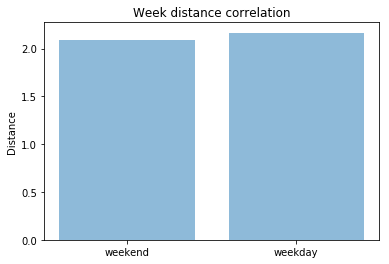

In [71]:
testing = "Distance"
weekendtest = data[data["Week"] == "weekend"][testing] 
weekdaytest = data[data["Week"] == "weekday" ][testing]  


weekend = single['Distance'].mean()
weekday = multi['Distance'].mean()

objects = ('weekend', 'weekday')
y_pos = np.arange(len(objects))
perf = [weekend,weekday]
 
plt.bar(y_pos, perf, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Distance')
plt.title('Week distance correlation')

plt.show()

In [72]:
stats.ttest_ind(weekendtest, weekdaytest, equal_var=False)

Ttest_indResult(statistic=5.604877366928616, pvalue=2.0924144330692153e-08)

We can reject the Null Hypothesis!